# Key Python Functions

### `search()`

In [1]:
from googlesearch import search
search_results = search(query="Machine Learning", tld='com', lang='en', num=10, start=0, stop=10, pause=2.0)

In [2]:
[s for s in search_results]

['https://en.wikipedia.org/wiki/Machine_learning',
 'https://en.wikipedia.org/wiki/Machine_Learning_(journal)',
 'https://en.wikipedia.org/wiki/Active_learning_(machine_learning)',
 'https://en.wikipedia.org/wiki/Machine_learning_control',
 'https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML',
 'https://www.sas.com/en_us/insights/analytics/machine-learning.html',
 'https://www.w3schools.com/python/python_ml_getting_started.asp',
 'https://www.coursera.org/learn/machine-learning',
 'https://www.bankofengland.co.uk/prudential-regulation/publication/2022/october/artificial-intelligence',
 'https://www.kdnuggets.com/2022/10/complete-free-pytorch-course-deep-learning.html']

### `urlopen()`

In [3]:
import urllib.request as url
url_link = "https://en.wikipedia.org/wiki/Machine_learning"
url_content = url.urlopen(url_link).read()

In [4]:
url_content[:1000]  # Just to show small amount of contents

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Machine learning - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dada55cf-22b3-41f3-8256-c9660df34733","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1115387735,"wgRevisionId":1115387735,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","All articles with unsourced statements","Articles with un

### `BeautifulSoup().text`

In [5]:
from bs4 import BeautifulSoup
text_content = BeautifulSoup(url_content, "html").text

In [6]:
text_content[:1000] # Just to show small amount of contents

'\n\n\n\nMachine learning - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMachine learning\n\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nStudy of algorithms that improve automatically through experience\nFor the journal, see Machine Learning (journal).\n"Statistical learning" redirects here. For statistical learning in linguistics, see statistical learning in language acquisition.\nPart of a series onMachine learningand data mining\nProblems\nClassification\nRegression\nClustering\ndimension reduction\ndensity estimation\nAnomaly detection\nData Cleaning\nAutoML\nAssociation rules\nStructured prediction\nFeature engineering\nFeature learning\nOnline learning\nReinforcement learning\nSupervised learning\nSemi-supervised learning\nUnsupervised learning\nLearning to rank\nGrammar induction\n\nSupervised learning(classification\xa0• regression) \nDecision trees\nEnsembles\nBagging\nBoosting\nRandom fores

### `WordCloud().generate(text)`

In [7]:
from wordcloud import WordCloud
WC = WordCloud(max_font_size=100, max_words=100, background_color="white", random_state=0).generate(text_content)

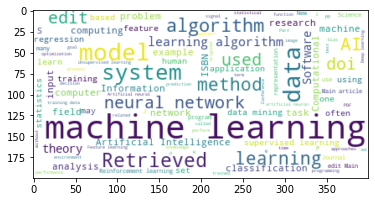

In [8]:
import matplotlib.pyplot as plt

plt.imshow(WC, interpolation="bilinear");

# Full Implementation

In [9]:
from googlesearch import search
import urllib.request as url
from bs4 import BeautifulSoup
import re
import string
import pandas as pd
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
## Fetching the search results for a Search Query (to be entered as user input) ##

qry = input("Enter search query: ")
search_results = search(query=qry, tld='com', lang='en', num=10, start=0, stop=20, pause=2.0)
urls = [s for s in search_results]

Enter search query:  Data Science


In [11]:
## Extracting the content from top 10 results ##

print("Extracting the content from top 10 search results..")
web_content_cleaned_all = []

for u in list(range(10)):
    try:
        weburl = url.urlopen(urls[u])
        web_content = weburl.read()
        web_content_cleaned = BeautifulSoup(web_content, "html").text
        web_content_cleaned = [val.lower() for val in web_content_cleaned.split(' ') if val.isalpha() or val.isnumeric()]
        web_content_cleaned_all.extend(web_content_cleaned)
    except:
        next

Extracting the content from top 10 search results..


In [12]:
len(web_content_cleaned_all)

11443

In [13]:
## Cleaning the extracted content (lemmatization, stop word removal) ##

print("Processing the data..")
lemmatizer = WordNetLemmatizer()
qry_words = qry.lower().split(' ') + [lemmatizer.lemmatize(w) for w in qry.lower().split(' ')]
stop_words = list(set(stopwords.words('english'))) + qry_words + ['archived','original','retrieved']
web_content_cleaned_final = [lemmatizer.lemmatize(word) for word in web_content_cleaned_all if word not in stop_words]

Processing the data..


Generating Word Cloud..


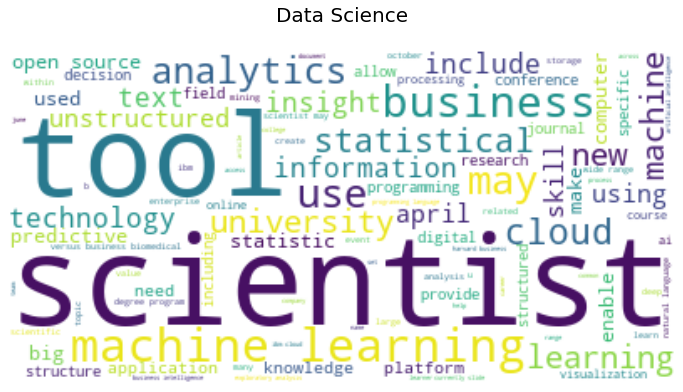

In [14]:
## Generating the Word Cloud on cleaned text ##

print("Generating Word Cloud..")
text_final = ' '.join(web_content_cleaned_final)
# text_final = ' '.join(web_content_cleaned_all)
wordcloud = WordCloud(max_font_size=100, max_words=100,
                      background_color="white",random_state=0).generate(text_final)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(qry+'\n',size=20)
plt.axis("off")
plt.show()